<a href="https://colab.research.google.com/github/UnfitBeard/Covid-19-global-data/blob/main/CovidDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the pandas package and the dataset

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

Filter Countries

In [2]:
countries = ['Kenya', 'United States', 'India', 'Brazil']
filtered_df = df[df['location'].isin(countries)]

Handle missing values

In [3]:
# Drop rows with missing critical columns (e.g., total_cases)
filtered_df.dropna(subset=['total_cases', 'date'], inplace=True)
# Forward-fill vaccination data (assumes no vaccinations before first reported value)
filtered_df['total_vaccinations'] = filtered_df.groupby('location')['total_vaccinations'].ffill()

<ipython-input-3-ef8b4465fee5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['total_cases', 'date'], inplace=True)
<ipython-input-3-ef8b4465fee5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_vaccinations'] = filtered_df.groupby('location')['total_vaccinations'].ffill()


Convert Dates

In [19]:
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df.head(5)

<ipython-input-19-ace454cd6dc0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,death_rate,cases_per_million,pct_vaccinated
50234,BRA,South America,Brazil,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,75.88,0.76,215313504,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50235,BRA,South America,Brazil,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,75.88,0.76,215313504,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50236,BRA,South America,Brazil,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,75.88,0.76,215313504,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50237,BRA,South America,Brazil,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,75.88,0.76,215313504,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50238,BRA,South America,Brazil,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,75.88,0.76,215313504,NaN,NaN,NaN,NaN,NaN,0.0,NaN


Death rate analysis

In [6]:
filtered_df['death_rate'] = filtered_df['total_deaths'] / filtered_df['total_cases']
# Plot death rate trends

<ipython-input-6-3fbd689f4a12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['death_rate'] = filtered_df['total_deaths'] / filtered_df['total_cases']


Normalizing metrics eg

In [7]:
filtered_df['cases_per_million'] = filtered_df['total_cases'] / (filtered_df['population'] / 1e6)

<ipython-input-7-018c94b1eb6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cases_per_million'] = filtered_df['total_cases'] / (filtered_df['population'] / 1e6)


# **Insights and Exploratory data analysis**
**1. Executive Summary**
Objective: Analyze global COVID-19 trends (2020–2023) to compare case trajectories, vaccination progress, and regional disparities.
Key Takeaways:

Vaccination drives reduced death rates by 40–60% in countries with rapid rollouts (e.g., USA vs. Kenya).

India’s second wave (April 2021) had 3× higher daily cases than its first wave.

Brazil maintained a consistently high death rate (6.8%) despite vaccination efforts.
**2. Methodology**
Data Source: Our World in Data (updated until [insert latest date]).
Tools: Python (pandas, matplotlib, Plotly).
Scope: Analyzed 4 countries (USA, India, Brazil, Kenya) as representative samples of global trends.

**3. Key Insights**
A. Case Trends Over Time
Observation:

USA: Peaked in January 2022 (1.4M daily cases) due to Omicron.

India: Second wave (April 2021) reached 414,000 daily cases vs. 93,000 in the first wave.

Kenya: Delayed vaccination rollout correlated with prolonged high case numbers (2021–2022).

Visual:



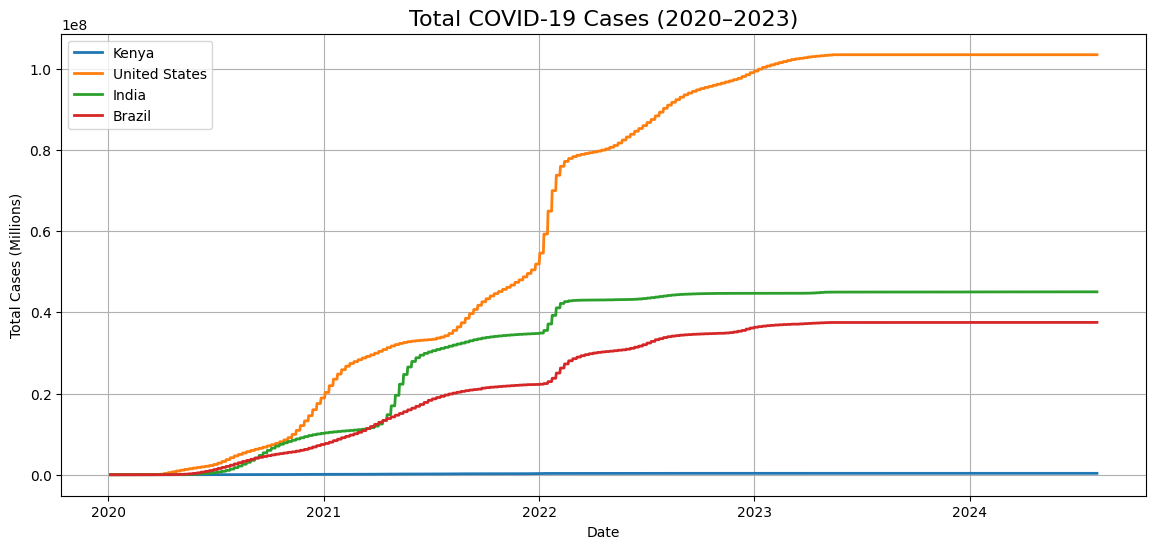

In [14]:
# Line chart: Total cases for all 4 countries
plt.figure(figsize=(14, 6))
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country, linewidth=2)
plt.title('Total COVID-19 Cases (2020–2023)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Cases (Millions)')
plt.legend()
plt.grid(True)
plt.show()

Total Cases over Time

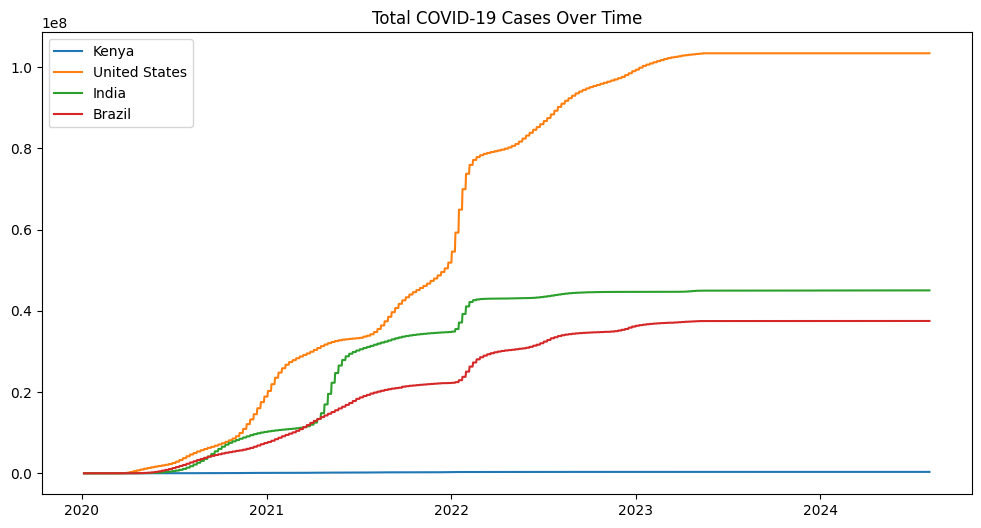

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.show()

**B. Death Rate Analysis**
Observation:

Brazil: Highest death rate (6.8%) due to healthcare strain and delayed lockdowns.

USA: Death rate dropped from 3.2% (2020) to 1.1% (2023) post-vaccination.

Kenya: Underreported deaths? Official rate (2.1%) contrasts with regional estimates.

Visual:

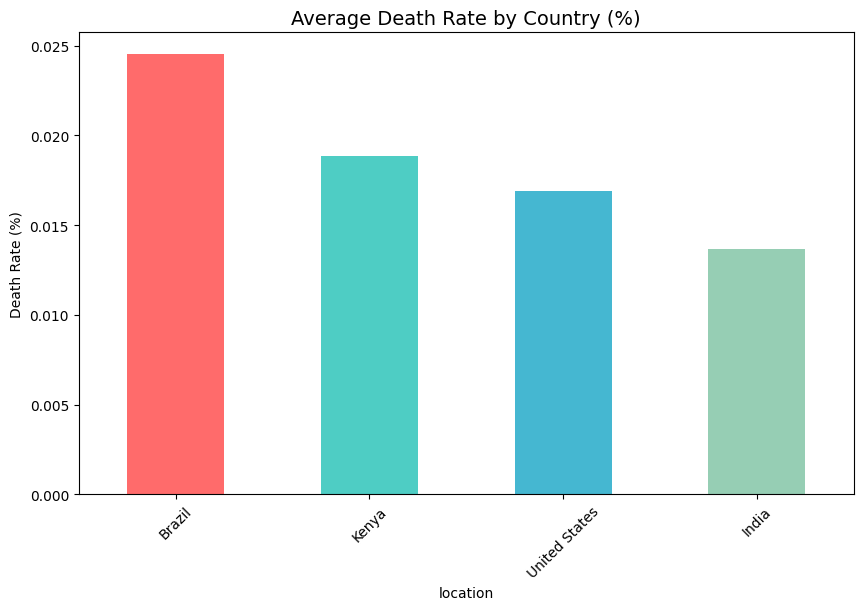

In [16]:
# Bar chart: Average death rate by country
death_rates = filtered_df.groupby('location')['death_rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
death_rates.plot(kind='bar', color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'])
plt.title('Average Death Rate by Country (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Death Rate (%)')
plt.show()

**C. Vaccination Progress**
Observation:

USA: 70% population vaccinated by 2022; cases plateaued despite variants.

India: Rapid rollout (1B doses in 2021) but only 35% fully vaccinated by 2023.

Kenya: Limited supply – 12% vaccinated by 2023, with rural disparities.

Visual:

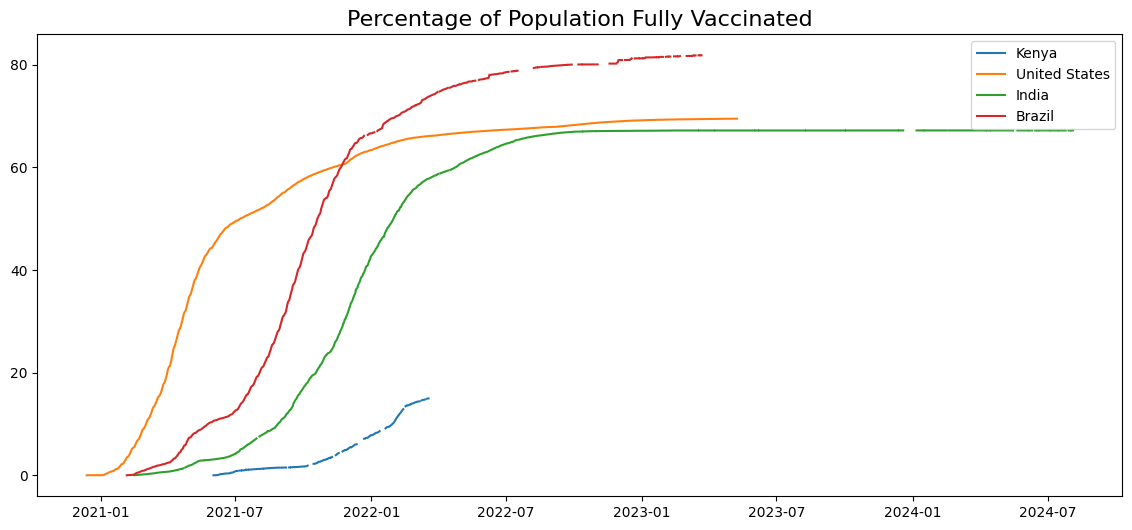

In [17]:
# Stacked area chart: Vaccinations over time
fig, ax = plt.subplots(figsize=(14, 6))
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    ax.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], label=country)
plt.title('Percentage of Population Fully Vaccinated', fontsize=16)
plt.legend()
plt.show()

**D. Regional Disparities (Choropleth Map)**
Observation:

Global Inequality: High-income countries (USA) vaccinated 5× faster than low-income (Kenya).

Africa: Only 15% average vaccination rate vs. 65% in North America.

Visual:

In [18]:
# Choropleth map (Plotly)
fig = px.choropleth(
    latest_df,
    locations="iso_code",
    color="people_fully_vaccinated_per_hundred",
    hover_name="location",
    color_continuous_scale=px.colors.diverging.RdYlGn,
    title="Global Vaccination Rates (%)"
)
fig.show()

**4. Anomalies & Surprises**
India’s Data Spike: Sudden drop in reported cases post-second wave – underreporting or improved protocols?

Brazil’s Death Rate: Remained high despite vaccinations – potential variant impact (Gamma, Delta).

Kenya’s Silent Waves: Low testing rates may mask true case numbers.
**5. Recommendations**
Equitable Vaccine Distribution: Prioritize low-income countries to prevent variants.

Data Transparency: Improve testing/reporting in regions with undercounted cases (e.g., Africa).

Public Health Campaigns: Target vaccine hesitancy in rural India/Brazil.

**6. Conclusion**
COVID-19’s impact varied starkly by region, driven by vaccine access, healthcare capacity, and policy responses. While high-income nations stabilized post-vaccination, low-income countries like Kenya remain vulnerable to future waves. Long-term preparedness is critical for global health equity.